In [6]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
train=pd.read_csv("Case_Study_Data_Train.csv")
test=pd.read_csv("Case_Study_Data_Test.csv")

In [8]:
train.head()

,Package,Sample,Medical_Description
0,Neurosurgery,VP Shunt Placement,"TITLE OF OPERATION: , Placement of right new v..."
1,Neurosurgery,Craniotomy - Frontal Zygomatic,"PREOPERATIVE DIAGNOSIS:, Metopic synostosis w..."
2,Neurosurgery,Wound Closure & Debridement - Hydrocephalus,"TITLE OF OPERATION:, A complex closure and de..."
3,Urology,Foul-Smelling Urine,"CHIEF COMPLAINT:, Foul-smelling urine and sto..."
4,Neurology,MRI Head,"EXAM:, MRI Head W&WO Contrast.,REASON FOR EXA..."


In [9]:
test.head()

,Package,Sample,Medical_Description
0,Ophthalmology,"Browlift, Blepharoplasty, & Rhytidectomy","PREOPERATIVE DIAGNOSES:,1. Eyebrow ptosis.,2...."
1,Orthopedic,Lumbar Discogram,"PREOPERATIVE DIAGNOSIS: , Low back pain.,POSTO..."
2,Cardiovascular / Pulmonary,Heart Catheterization & Angiography - 1,"CLINICAL INDICATION: ,Normal stress test.,PRO..."
3,Ophthalmology,Ophthalmology - Letter - 1,"XYZ, O.D.,RE: ABC,DOB: MM/DD/YYYY,Dear Dr. X..."
4,Neurosurgery,Scott Cannula,"PROCEDURE:, Placement of Scott cannula, right ..."


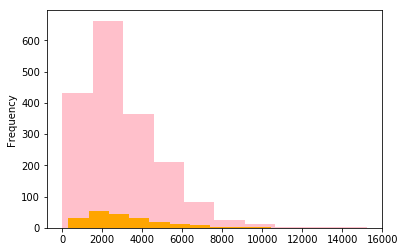

In [10]:
# checking the distribution of medical description column in the data

length_train = train['Medical_Description'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test['Medical_Description'].str.len().plot.hist(color = 'orange', figsize = (6, 4))
plt.savefig(os.path.join('distribution_plot.png'), dpi=300, format='png', bbox_inches='tight') 

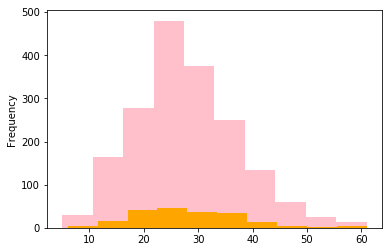

In [11]:
length_train = train['Sample'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test['Sample'].str.len().plot.hist(color = 'orange', figsize = (6, 4))


In [12]:
train.shape

(1812, 3)

In [13]:
test.shape

(202, 3)

In [14]:
train["Package"].unique()

array([' Neurosurgery', ' Urology', ' Neurology', ' Gastroenterology',
       ' Obstetrics / Gynecology', ' Cardiovascular / Pulmonary',
       ' Orthopedic', ' Pediatrics - Neonatal', ' Hematology - Oncology',
       ' Ophthalmology', ' Nephrology', ' ENT - Otolaryngology'],
      dtype=object)

In [15]:
test["Package"].unique()

array([' Ophthalmology', ' Orthopedic', ' Cardiovascular / Pulmonary',
       ' Neurosurgery', ' Gastroenterology', ' Urology',
       ' Hematology - Oncology', ' Obstetrics / Gynecology',
       ' ENT - Otolaryngology', ' Neurology', ' Nephrology',
       ' Pediatrics - Neonatal'], dtype=object)

In [16]:
test["Package"].nunique()

12

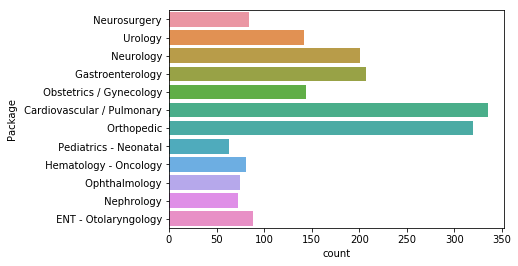

In [17]:
import os
sns.countplot(y="Package",data=train);
#plt.savefig(os.path.join('count_plot.png'), dpi=300, format='png', bbox_inches='tight') 

Text(0.5, 1.0, 'percentage of each category')

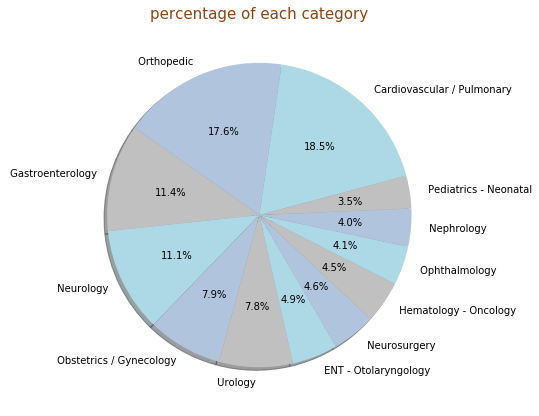

In [18]:
sizes=train.Package.value_counts().values
colors=['lightblue','lightsteelblue','silver']
plt.figure(figsize=(12,7))
labels=train.Package.value_counts().index
# plt.pie(sizes,labels=labels,colors=colors,autopct="%1.1f%%")
my_explode = (0, 0.1, 0)
plt.pie(sizes,labels=labels,  autopct='%1.1f%%', startangle=15, shadow = True, colors=colors)

plt.title("percentage of each category",color="saddlebrown",fontsize=15)
#plt.savefig(os.path.join('"percentage_of_each_package.png'), dpi=300, format='png', bbox_inches='tight') 

In [19]:
train.isnull().sum()

Package                 0
Sample                  0
Medical_Description    15
dtype: int64

In [20]:
test.isnull().sum()

Package                0
Sample                 0
Medical_Description    1
dtype: int64

In [21]:
variables_with_na=[var for var in train.columns if train[var].isnull().sum()>1]
for var in variables_with_na:
    print("column ", var,"having ",np.round(train[var].isnull().mean(),3),"% missing values")

column  Medical_Description having  0.008 % missing values


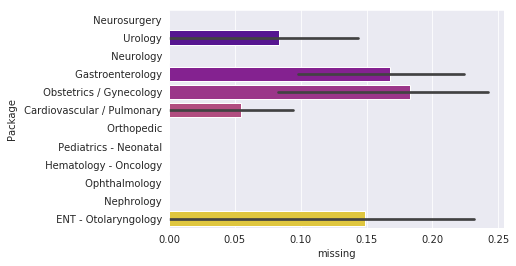

In [22]:
df=train.copy()
df["missing"]=np.where(df["Medical_Description"].isnull(),1,0)
sns.set_style('darkgrid')
 
# plot the graph using the default estimator mean
sns.barplot(x ='missing', y ='Package', data = df, palette ='plasma',estimator = np.std);
#plt.savefig(os.path.join("missing_data_in_each_category.png"), dpi=300, format='png', bbox_inches='tight')

In [23]:
count_series = df.groupby(["Package","missing"]).size()
new_df = count_series.to_frame(name = 'size').reset_index()
new_df[new_df["missing"]==1]

,Package,missing,size
1,Cardiovascular / Pulmonary,1,1
3,ENT - Otolaryngology,1,2
5,Gastroenterology,1,6
11,Obstetrics / Gynecology,1,5
16,Urology,1,1


In [24]:
#As we very less missing values, we drop them
train.dropna(inplace=True)
test.dropna(inplace=True)

In [25]:
dims = train.describe(include=[pd.Categorical]).T
dims["frequency"] = dims["freq"].div(dims["count"])# adding percentage freq for top dimension
dims.head()

,count,unique,top,freq,frequency
Package,1797,12,Cardiovascular / Pulmonary,334,0.185865
Sample,1797,1625,Adrenalectomy & Umbilical Hernia Repair,3,0.00166945
Medical_Description,1797,1624,"PREOPERATIVE DIAGNOSES,1. Adrenal mass, right...",3,0.00166945


In [26]:
from sklearn.preprocessing import LabelEncoder 
import re
labelencoder= LabelEncoder()
train['Package'] = labelencoder.fit_transform(train['Package'])
test['Package'] = labelencoder.fit_transform(test['Package'])

In [27]:
train["Package"].unique()


array([ 6, 11,  5,  2,  7,  0,  9, 10,  3,  8,  4,  1])

In [28]:

def text_preprocessing(txt):
    txt=txt.replace("\n","").replace('"',"").lower()
    txt = re.sub('[^a-zA-Z0-9 \n]', ' ', txt)
    txt=re.sub('\s+',' ',txt)
    return txt

In [29]:
train["Sample"]=train["Sample"].apply(text_preprocessing)
train["Medical_Description"]=train["Medical_Description"].apply(text_preprocessing)

In [30]:
import nltk
from nltk.corpus import stopwords
stop_words=list(stopwords.words('english'))

In [31]:
train['Sample'] = train['Sample'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop_words)]))
train['Medical_Description'] = train['Medical_Description'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop_words)]))

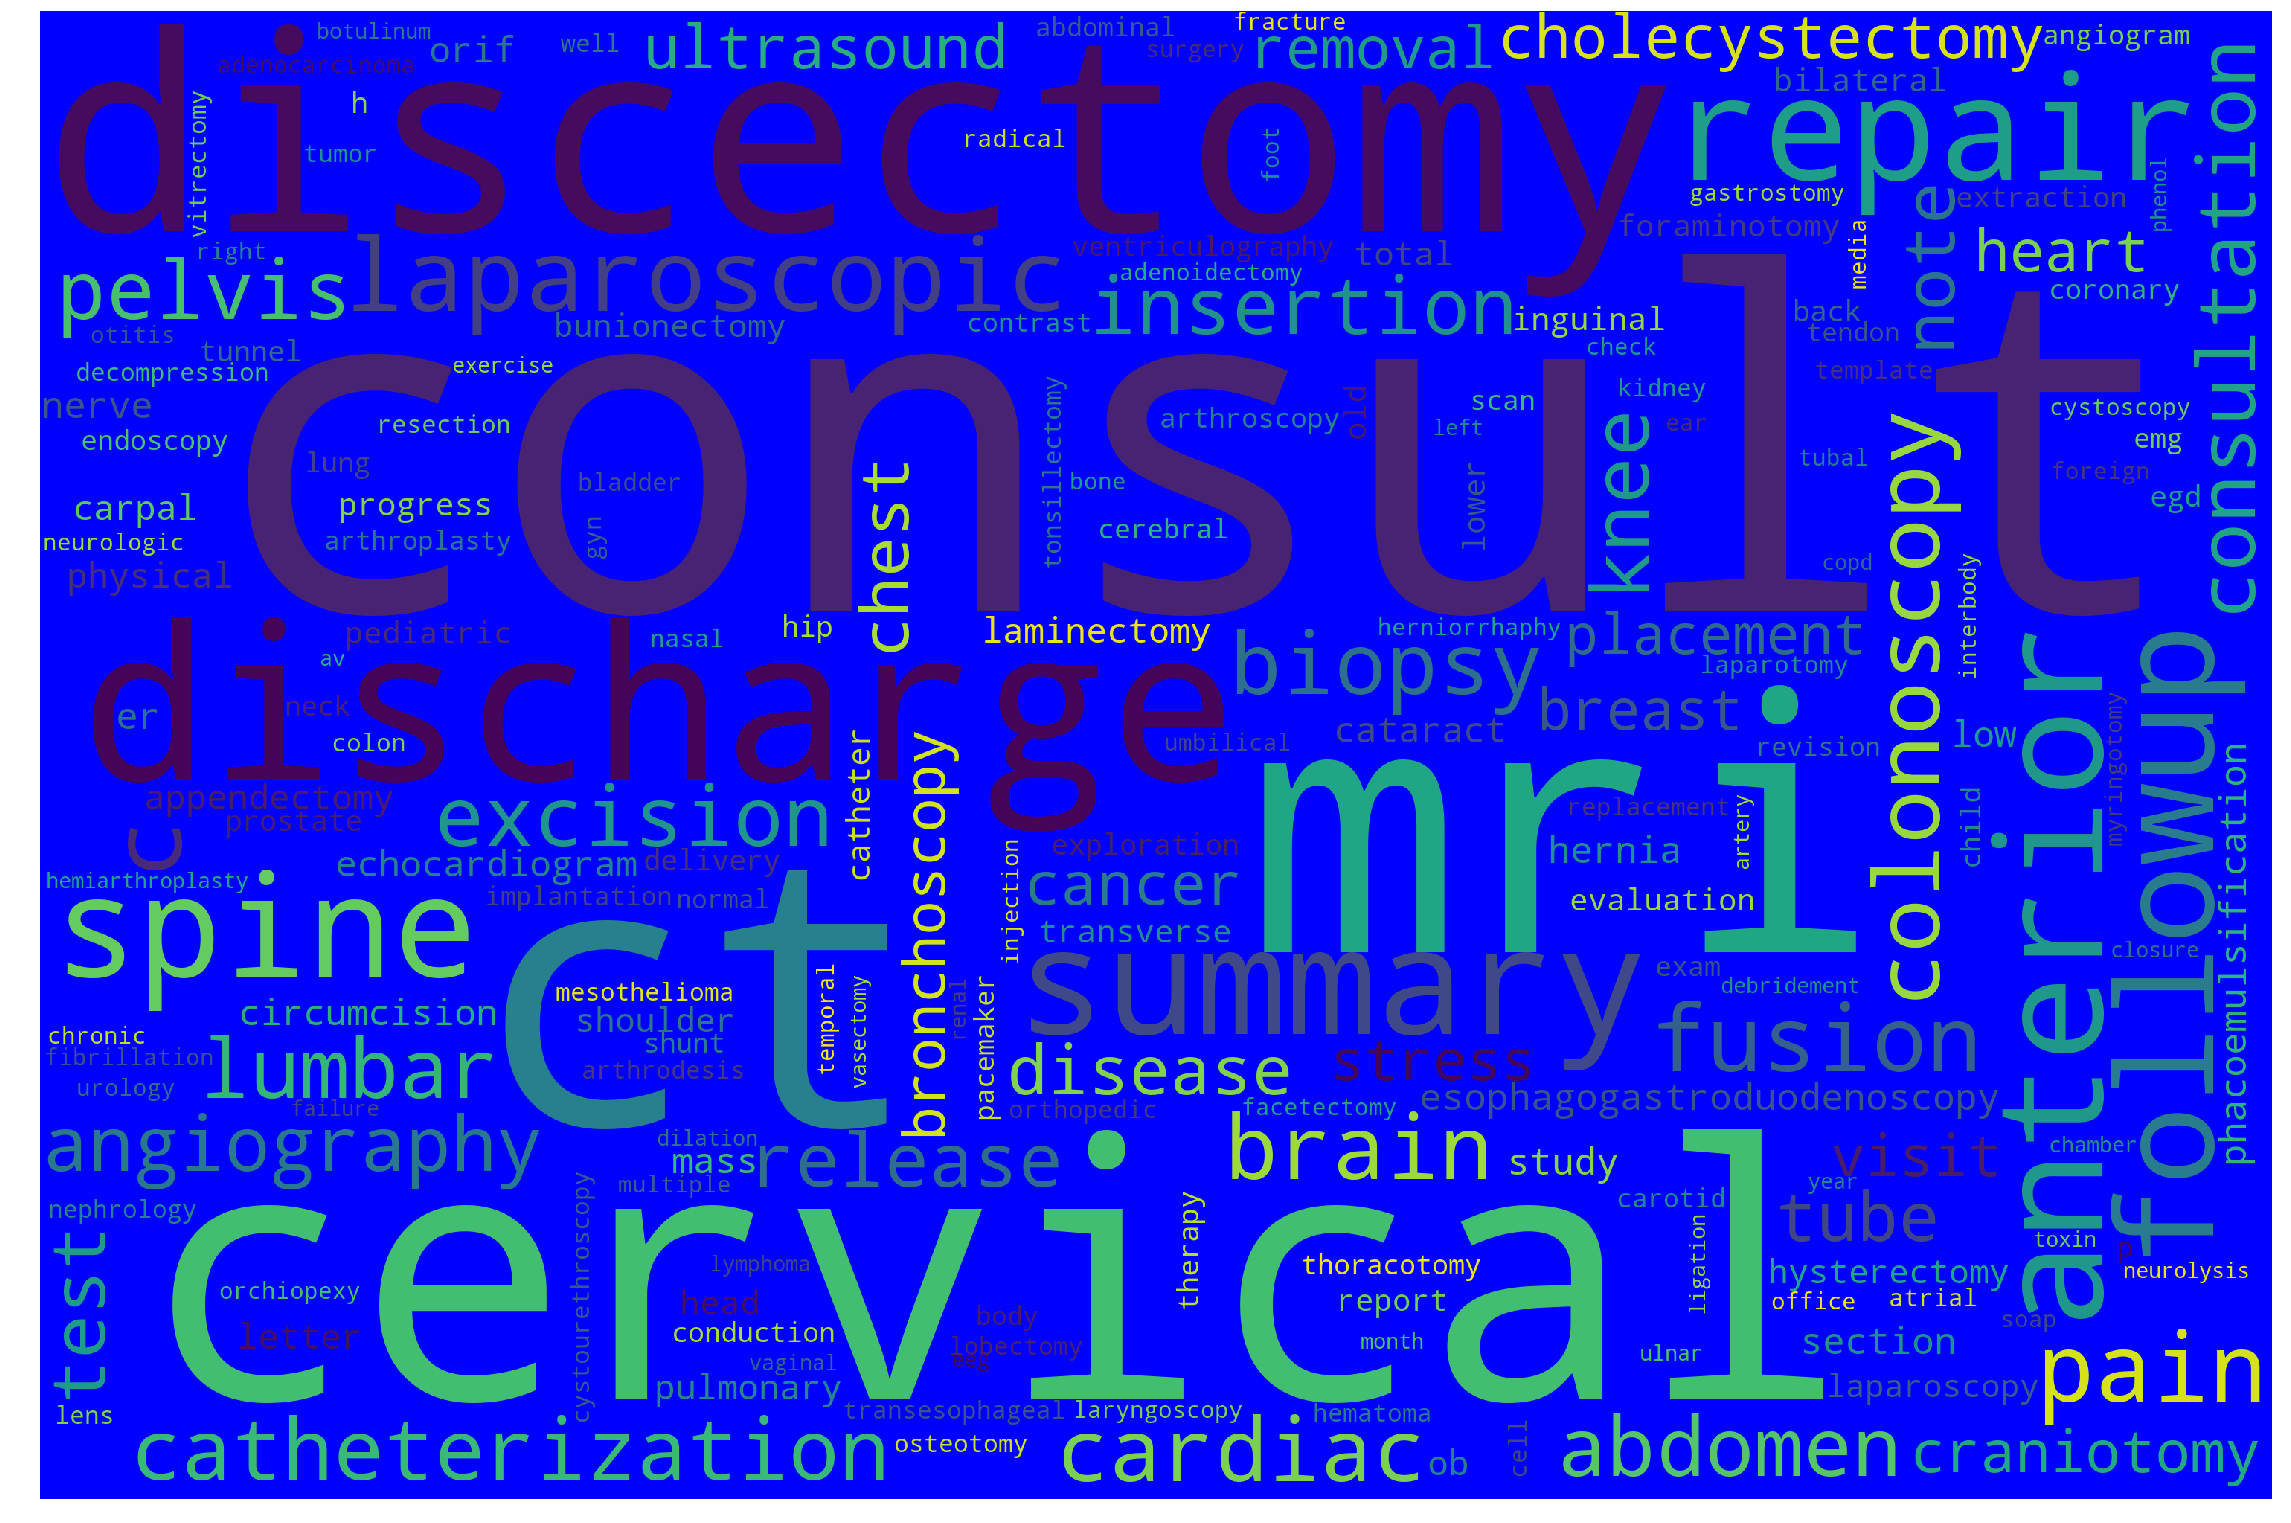

In [32]:
#!pip install wordcloud matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
l = [' '.join(train['Sample'])]
text = l[0]
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='blue', collocations=False, stopwords = STOPWORDS).generate(text)
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud) 
plt.axis("off")
plt.show()
# plt.savefig(os.path.join("word_cloud_for_Samples.jpg"), dpi=1000, format='jpg', bbox_inches='tight')

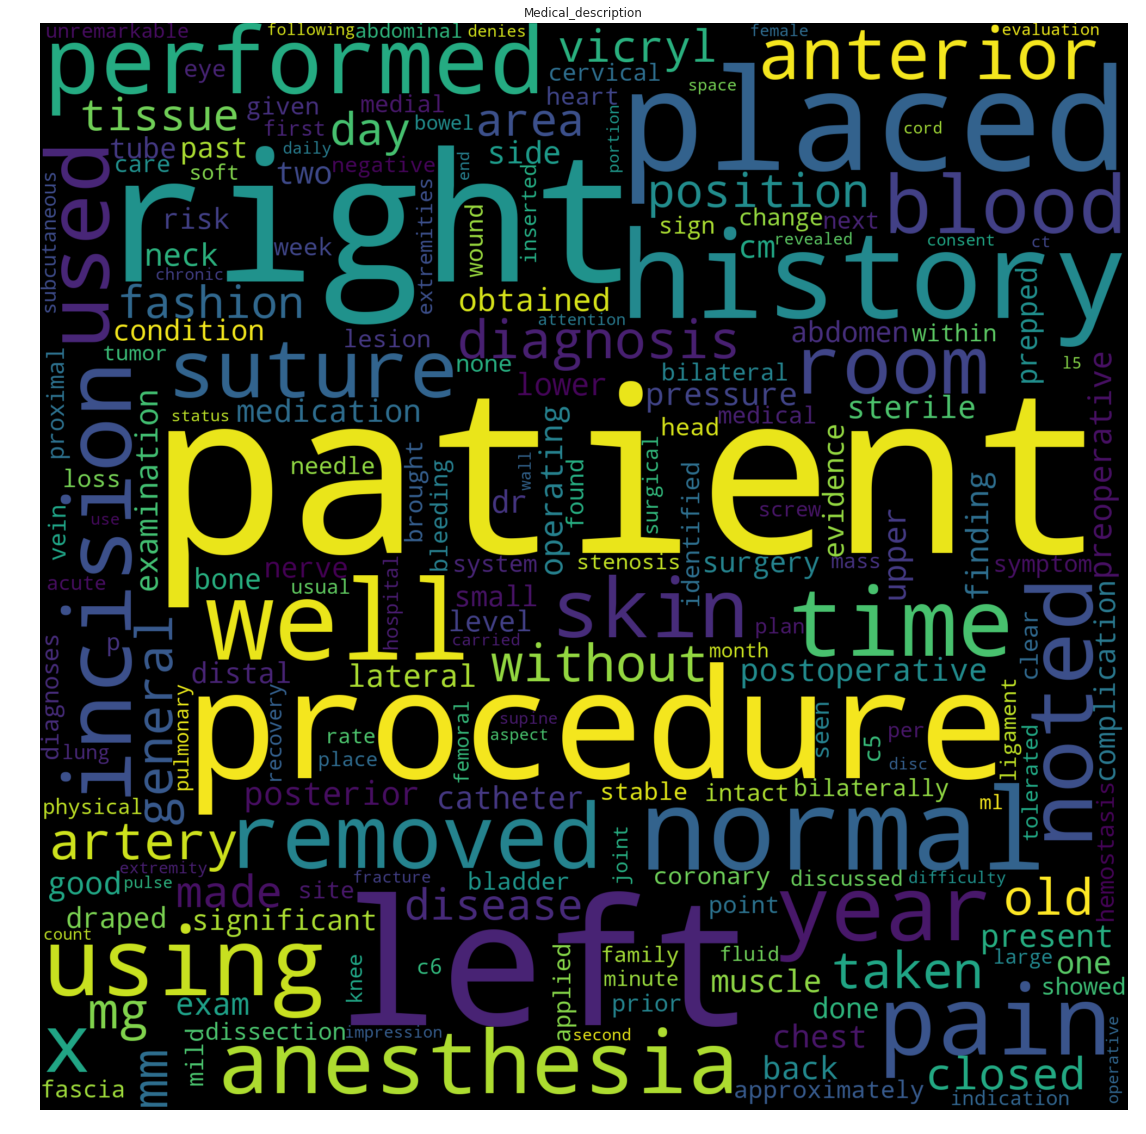

In [50]:
words =' '.join([text for text in train['Medical_Description']])

wordcloud = WordCloud(width=2000, height=2000, random_state = 0,collocations=False, stopwords = STOPWORDS).generate(words)
plt.figure(figsize=(20, 20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Medical_description')
plt.show()
#plt.savefig(os.path.join("word_cloud_for_Medical_description.jpg"), dpi=1000, format='jpg', bbox_inches='tight')

In [34]:
train.loc[1]["Medical_Description"]

'preoperative diagnosis metopic synostosis trigonocephaly postoperative diagnosis metopic synostosis trigonocephaly procedures 1 bilateral orbital frontal zygomatic craniotomy skull base approach 2 bilateral orbital advancement c shaped osteotomies inferior orbital rim bilateral orbital advancement bone grafts 3 bilateral forehead reconstruction autologous graft 4 advancement temporalis muscle bilaterally 5 barrel stave osteotomies parietal bones anesthesia general procedure induction general anesthesia patient placed supine operating room table roll shoulders head resting foam doughnut scalp clipped prepped chloraprep incision infiltrated 0 5 xylocaine epinephrine 1 200 000 received antibiotics reprepped draped sterile manner bicoronal zigzag incision made raney clips used hemostasis subcutaneous flaps developed reflected anteriorly slightly posteriorly subgaleal flaps bipolar bovie cautery used hemostasis craniectomy outlined methylene blue pericranium incised exposing bone along out

In [35]:
from nltk.tokenize import word_tokenize
train["Processed_text"]=train["Sample"]+" "+train["Medical_Description"]
#test["Processed_text"]=test["Sample"]+" "+test["Medical_Description"]

#train["Processed_text"]=train["Processed_text"].apply(lambda x:word_tokenize(str(x)))

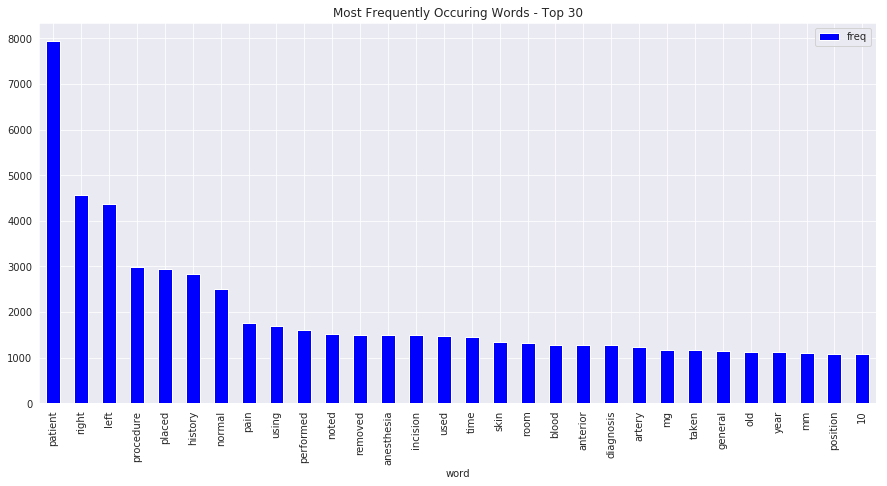

In [36]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.Medical_Description)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")
#plt.savefig(os.path.join("Most_Frequently_Occuring Words_Medical_description.jpg"), dpi=1000, format='jpg', bbox_inches='tight')

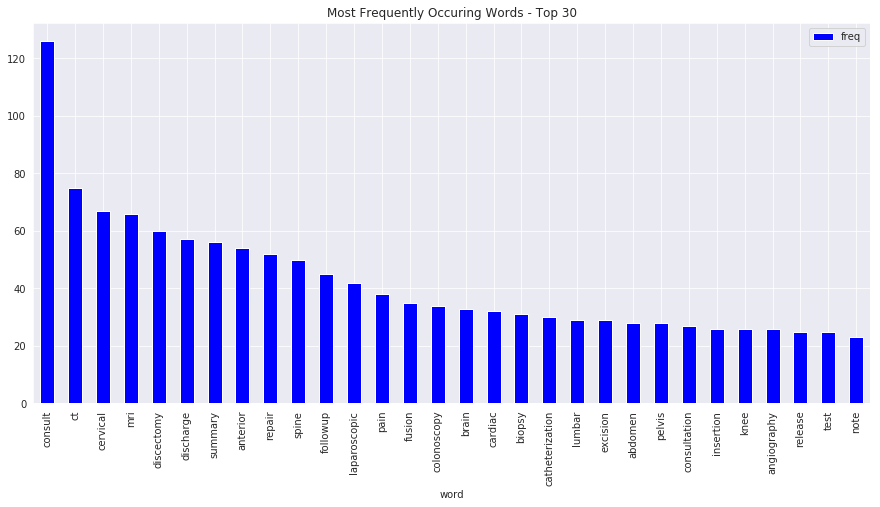

In [37]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.Sample)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")
#plt.savefig(os.path.join("Most_Frequently_Occuring Words_Sample.jpg"), dpi=1000, format='jpg', bbox_inches='tight')

In [38]:
X=train["Processed_text"]
y=train['Package']

X.shape, y.shape

((1797,), (1797,))

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect=CountVectorizer()
X_train=count_vect.fit_transform(train.Processed_text)

In [40]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf=TfidfTransformer()
X_train_tfidf=tfidf.fit_transform(X_train)


In [41]:
import pickle
pickle.dump(count_vect.vocabulary_,open("count_vector.pkl","wb"))
pickle.dump(tfidf,open("tfidf_vector.pkl","wb"))

In [42]:
from sklearn import svm
from sklearn.model_selection import train_test_split
clf_svm=svm.LinearSVC()
X_train,X_test,y_train,y_test=train_test_split(X_train_tfidf,train.Package,test_size=0.25,random_state=42)
clf_svm.fit(X_train_tfidf,train.Package)
pickle.dump(clf_svm,open("svm.pkl","wb"))

In [51]:
predicted=clf_svm.predict(X_test)
result_svm=pd.DataFrame({"true labels":y_test,"predicted":predicted})
for predicted_item,result in zip(predicted,y_test):
    print(predicted_item,"-",result)
    

1 - 1
6 - 6
0 - 0
9 - 9
9 - 9
11 - 11
2 - 2
0 - 0
5 - 5
8 - 8
2 - 2
9 - 9
5 - 5
6 - 6
7 - 7
9 - 9
0 - 0
7 - 7
5 - 5
6 - 6
9 - 9
7 - 7
2 - 2
5 - 5
9 - 5
2 - 2
11 - 11
0 - 0
5 - 5
2 - 2
0 - 0
2 - 2
2 - 2
11 - 11
9 - 9
5 - 6
1 - 1
4 - 4
9 - 9
9 - 9
0 - 0
0 - 0
7 - 7
11 - 11
9 - 9
5 - 5
6 - 5
8 - 8
11 - 11
9 - 9
9 - 9
0 - 0
6 - 6
5 - 5
5 - 5
5 - 5
7 - 7
0 - 0
5 - 5
7 - 7
11 - 11
5 - 5
0 - 0
0 - 0
3 - 3
10 - 10
11 - 11
0 - 0
3 - 3
8 - 8
2 - 2
9 - 9
0 - 10
11 - 11
3 - 3
2 - 2
10 - 10
7 - 7
1 - 1
2 - 2
3 - 3
11 - 11
9 - 9
9 - 9
9 - 9
0 - 0
2 - 2
4 - 4
0 - 0
6 - 6
9 - 9
1 - 1
11 - 11
2 - 2
8 - 8
7 - 7
0 - 0
8 - 8
6 - 6
7 - 3
9 - 9
11 - 11
7 - 7
3 - 3
11 - 11
0 - 0
0 - 0
1 - 1
3 - 3
6 - 9
5 - 5
1 - 1
0 - 0
0 - 0
5 - 5
2 - 2
0 - 0
5 - 5
6 - 5
1 - 1
6 - 6
0 - 0
7 - 7
11 - 11
11 - 11
2 - 2
2 - 3
11 - 11
0 - 0
0 - 0
2 - 2
0 - 0
6 - 5
11 - 11
7 - 7
2 - 2
0 - 0
9 - 9
0 - 0
0 - 0
9 - 9
1 - 1
7 - 7
0 - 0
11 - 11
1 - 1
11 - 11
6 - 6
2 - 2
9 - 9
8 - 8
0 - 0
5 - 5
9 - 9
3 - 3
10 - 10
5 - 5
6 - 6
9 - 9
3 -

In [52]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
print("Classification report: \n", (classification_report(y_test, predicted)))
print("F1 Score:",(f1_score(y_test, predicted, average='micro')))


Classification report: 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        79
           1       0.96      0.92      0.94        25
           2       0.98      0.96      0.97        48
           3       0.95      0.86      0.90        21
           4       0.94      0.94      0.94        17
           5       0.90      0.85      0.88        54
           6       0.67      0.56      0.61        25
           7       0.97      1.00      0.98        29
           8       0.96      1.00      0.98        26
           9       0.84      0.90      0.87        71
          10       0.86      0.50      0.63        12
          11       0.96      1.00      0.98        43

    accuracy                           0.91       450
   macro avg       0.91      0.87      0.89       450
weighted avg       0.91      0.91      0.91       450

F1 Score: 0.9111111111111111


In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predicted)

0.9111111111111111

In [54]:
from sklearn.metrics import recall_score
recall_score(y_test, predicted, average='micro')

0.9111111111111111